# MarTechR-EMBA - Inventory Management庫存管理Steve.ipynb

In [ ]:
install.packages("lubridate")
install.packages("dplyr")
install.packages("readxl")
install.packages("magrittr")
install.packages("zoo")
install.packages("forecast")
install.packages("ggplot2")
install.packages("rattle")
install.packages("rpart")
#install.packages("RGtk2")
install.packages("ggplot2")
install.packages("openxlsx")
library(lubridate)
library(dplyr)
library(readxl)
library(magrittr)
library(zoo)
library(forecast)
library(readr)
library(ggplot2)
library(rattle)	
library(rpart) 
#library(RGtk2)
library(openxlsx)

In [ ]:
# load("/content/sample_data/R_InventoryManagement.RData")

In [ ]:
orders <- read_excel("/content/sample_data/EMBA-InventoryManagement.xls")
dim(orders)
names(orders)

[1] 32766     6

[1] "dateDeliver"   "clientID"      "itemID"        "quantityOrder"
[5] "orderNo"       "orderDate"

In [ ]:
head(orders)

dateDeliver,clientID,itemID,quantityOrder,orderNo,orderDate
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
2019/04/10,0230005,A5000016,1,1221-2019040040 -0001,2019/04/03
2019/07/19,0230005,A5000016,9,1221-2019070166 -0001,2019/07/17
2019/08/02,0230005,A5000016,1,1221-2019080036 -0001,2019/08/02
2019/08/14,0230005,A5000016,4,1221-2019080134 -0003,2019/08/13
2019/05/02,0230005,A5100037,10,1221-2019050002 -0001,2019/05/02
2018/01/10,0260002,A5100207,5,1225-2017120060 -0002,2017/12/25


In [ ]:
orders02Test <- read_excel("/content/sample_data/EMBA-InventoryManagement02.xlsx")
dim(orders02Test)
names(orders02Test)
# 看看你原始的 Excel　檔案

New names:
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6



[1] 2606    6

[1] "加總 - quantityOrder" "order_year"           "...3"                
[4] "...4"                 "...5"                 "...6"

#查table 所有欄位名稱與維度
Check all the column names and dimensions of the table

In [ ]:
orders02 <- read_excel("/content/sample_data/EMBA-InventoryManagement02.xlsx", sheet = "Data")
dim(orders02)
names(orders02)

[1] 32181    11

[1] "dateDeliver"         "clientID"            "itemID"             
 [4] "quantityOrder"       "unit"                "orderNo"            
 [7] "orderDate"           "order_year"          "order_mth"          
[10] "diff_order_delivery" "season"

In [ ]:
head(orders02)

dateDeliver,clientID,itemID,quantityOrder,unit,orderNo,orderDate,order_year,order_mth,diff_order_delivery,season
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2018/10/23,0250538,W1000100,0.50,卷,1225-2018100033 -0002,2018/10/15,2018,10,8,4
2018/01/10,0260002,X5000013,0.76,PCS,1225-2017120057 -0029,2017/12/25,2017,12,16,4
2018/01/02,0040033,AZ064480,1.00,PCS,1221-2017110246 -0004,2017/11/22,2017,11,41,4
2018/01/02,0040033,AZ064484,1.00,PCS,1221-2017110246 -0005,2017/11/22,2017,11,41,4
2018/01/02,0040033,AZ064484,1.00,PCS,1221-2017110188 -0001,2017/11/17,2017,11,46,4
2018/01/02,0040033,AZ064484,1.00,PCS,1221-2017110295 -0001,2017/11/27,2017,11,36,4


#列出資料內每個欄位的狀態
List the status of each field in the data

In [ ]:
str(orders02)

tibble[,11] [32,181 × 11] (S3: tbl_df/tbl/data.frame)
 $ dateDeliver        : chr [1:32181] "2018/10/23" "2018/01/10" "2018/01/02" "2018/01/02" ...
 $ clientID           : chr [1:32181] "0250538" "0260002" "0040033" "0040033" ...
 $ itemID             : chr [1:32181] "W1000100" "X5000013" "AZ064480" "AZ064484" ...
 $ quantityOrder      : num [1:32181] 0.5 0.76 1 1 1 1 1 1 1 1 ...
 $ unit               : chr [1:32181] "卷" "PCS" "PCS" "PCS" ...
 $ orderNo            : chr [1:32181] "1225-2018100033 -0002" "1225-2017120057 -0029" "1221-2017110246 -0004" "1221-2017110246 -0005" ...
 $ orderDate          : chr [1:32181] "2018/10/15" "2017/12/25" "2017/11/22" "2017/11/22" ...
 $ order_year         : num [1:32181] 2018 2017 2017 2017 2017 ...
 $ order_mth          : num [1:32181] 10 12 11 11 11 11 11 10 10 12 ...
 $ diff_order_delivery: num [1:32181] 8 16 41 41 46 36 36 67 77 6 ...
 $ season             : num [1:32181] 4 4 4 4 4 4 4 4 4 4 ...


#summary()則給出每個欄位的「最大值」、「最小值」、「平均值」、「中位數」「第一四分位數」
summary() gives the ``maximum'', ``minimum'', ``average'', ``median'' and ``first quartile'' of each field

In [ ]:
summary(orders02)

 dateDeliver          clientID            itemID          quantityOrder    
 Length:32181       Length:32181       Length:32181       Min.   :   0.50  
 Class :character   Class :character   Class :character   1st Qu.:   1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :   2.00  
                                                          Mean   :  13.09  
                                                          3rd Qu.:   6.00  
                                                          Max.   :6400.00  
     unit             orderNo           orderDate           order_year  
 Length:32181       Length:32181       Length:32181       Min.   :2017  
 Class :character   Class :character   Class :character   1st Qu.:2018  
 Mode  :character   Mode  :character   Mode  :character   Median :2019  
                                                          Mean   :2019  
                                                          3rd Qu.:2020  
                              

#統計所有訂單資找出銷售產品前 10 大排行
Count all orders to find the top 10 products sold

In [ ]:
ordersByitem <- orders02 %>% 
 group_by(Numitem= itemID) %>%                #group_by  itemID 小計
  summarise(TotalCount=n(), Sumqty=sum(quantityOrder)) %>% #summarise  quantityOrder 總計
  mutate(conversordersRate = as.integer(Sumqty/TotalCount) )      # 平均單次訂單數量
head(ordersByitem)

Numitem,TotalCount,Sumqty,conversordersRate
<chr>,<int>,<dbl>,<int>
A5000016,4,15,3
A5100037,1,10,10
A5100207,15,52,3
A5100241,2,10,5
A5100256,23,344,14
A5100364,1,1,1


# Sumqty 哪一個客戶訂單數量最多
Sumqty which customer has the most orders

In [ ]:
ordersByitem_top10Sumqty <- top_n(ordersByitem, 10, Sumqty)  %>% arrange(desc(Sumqty))
ordersByitem_top10Sumqty

Numitem,TotalCount,Sumqty,conversordersRate
<chr>,<int>,<dbl>,<int>
X5500220,5,28800,5760
ET300493,12,11810,984
X2510051,8,11174,1396
M1020041,938,8971,9
E8100029,3,7450,2483
EB000241,9,6000,666
AZ062656,22,5970,271
AZ500061,274,5098,18
W0100449,181,4671,25


# conversordersRate 哪一個客戶單次訂最多
conversordersRate which customer has the most single order

In [ ]:
ordersByitem_top10conversordersRate <- top_n(ordersByitem, 10, Sumqty)  %>% arrange(desc(conversordersRate))
ordersByitem_top10conversordersRate

Numitem,TotalCount,Sumqty,conversordersRate
<chr>,<int>,<dbl>,<int>
X5500220,5,28800,5760
E8100029,3,7450,2483
X2510051,8,11174,1396
ET300493,12,11810,984
EB000241,9,6000,666
AZ062656,22,5970,271
AZ064750,17,4616,271
W0100449,181,4671,25
AZ500061,274,5098,18


#統計所有訂單資找出銷售產品前 10 大客戶排行
Count all the orders and find out the top 10 customers for selling products

In [ ]:
ordersBycust <- orders02 %>% 
  group_by(numcust=clientID) %>% #group_by小計
  summarise(TotalCount=n(), Sumqty=sum(quantityOrder)) %>% #summarise總計
  mutate(conversordersRatey = as.integer(Sumqty/TotalCount))
head(ordersBycust)

numcust,TotalCount,Sumqty,conversordersRatey
<chr>,<int>,<dbl>,<int>
0010009,12,37,3
0010015,23,42,1
0020009,38,17602,463
0020013,64,105,1
0020030,4,4,1
0020048,268,527,1


# Sumqty 哪一個商品訂單數量最多
Sumqty which product has the most orders

In [ ]:
ordersBycust_top10Sumqty <- top_n(ordersBycust, 10, Sumqty)  %>% arrange(desc(Sumqty))
ordersBycust_top10Sumqty

numcust,TotalCount,Sumqty,conversordersRatey
<chr>,<int>,<dbl>,<int>
0260002,2324,133163.9,57
0040084,1545,26216.0,16
0250040,534,23146.0,43
0240002,2680,18820.0,7
0020009,38,17602.0,463
0220012,51,13768.0,269
0250102,434,13723.0,31
0020320,764,13534.0,17
0040143,812,13504.0,16


# conversordersRate 哪一個商品單次訂最多
conversordersRate which product has the most single order

In [ ]:
ordersBycust_top10conversordersRatey <- top_n(ordersBycust, 10, Sumqty)  %>% arrange(desc(conversordersRatey))
ordersBycust_top10conversordersRatey

numcust,TotalCount,Sumqty,conversordersRatey
<chr>,<int>,<dbl>,<int>
0020009,38,17602.0,463
0220012,51,13768.0,269
0250345,52,12559.0,241
0260002,2324,133163.9,57
0250040,534,23146.0,43
0250102,434,13723.0,31
0020320,764,13534.0,17
0040084,1545,26216.0,16
0040143,812,13504.0,16


#每季銷售產品排行
Quarterly sales product ranking

In [ ]:
ordersByitem_season <- orders02 %>% 
  group_by(NumitemID=itemID, numseason=season) %>%       #group_by小計
  summarise(TotalCount=n(), Sumqty=sum(quantityOrder)) %>%  #summarise總計
  mutate(conversordersRatey= as.integer(Sumqty/TotalCount)) %>% arrange( desc(Sumqty) )
head(ordersByitem_season, 16)

`summarise()` has grouped output by 'NumitemID'. You can override using the `.groups` argument.



NumitemID,numseason,TotalCount,Sumqty,conversordersRatey
<chr>,<dbl>,<int>,<dbl>,<int>
X5500220,4,3,19200,6400
X5500220,2,1,6400,6400
E8100029,4,2,6350,3175
X2510051,1,4,6000,1500
X5500219,4,1,4000,4000
ET300493,4,5,3830,766
ET300493,2,3,3780,1260
ET300493,3,3,3780,1260
X5500220,3,1,3200,3200


#篩選各季季 依據 Sumqty 排序
Filter each season Sort by Sumqty

In [ ]:
ordersByseason1<-filter(ordersByitem_season,numseason==1)  #篩選第1季
ordersByseason1_top10 <- top_n(ordersByseason1, 10, Sumqty) %>% arrange(desc(Sumqty)) 
head(ordersByseason1_top10, n = 10)

NumitemID,numseason,TotalCount,Sumqty,conversordersRatey
<chr>,<dbl>,<int>,<dbl>,<int>
X2510051,1,4,6000,1500
M1020041,1,258,2419,9
AZ062494,1,6,2415,402
AZ064562,1,9,2347,260
X2B00160,1,1,2250,2250
EB000241,1,3,2200,733
AZ064750,1,8,1893,236
W0100428,1,1,1400,1400
W0100449,1,48,1375,28


In [ ]:
ordersByseason2<-filter(ordersByitem_season,numseason==2)#篩選第2季
ordersByseason2_top10 <- top_n(ordersByseason2, 10, Sumqty)  %>% arrange(desc(Sumqty))
head(ordersByseason2_top10, n=10)

NumitemID,numseason,TotalCount,Sumqty,conversordersRatey
<chr>,<dbl>,<int>,<dbl>,<int>
X5500220,2,1,6400,6400
ET300493,2,3,3780,1260
M1020041,2,239,2160,9
GAZ00002,2,5,2015,403
AZ064750,2,5,1761,352
AZ064019,2,56,1518,27
W0100449,2,42,1315,31
AZ062656,2,7,1262,180
AZ500061,2,66,1258,19


In [ ]:
ordersByseason3<-filter(ordersByitem_season,numseason==3)#篩選第3季
ordersByseason3_top10 <- top_n(ordersByseason3, 10, Sumqty)  %>% arrange(desc(Sumqty))
head(ordersByseason3_top10, n= 10)

NumitemID,numseason,TotalCount,Sumqty,conversordersRatey
<chr>,<dbl>,<int>,<dbl>,<int>
ET300493,3,3,3780,1260
X5500220,3,1,3200,3200
X2510051,3,2,3000,1500
M1020041,3,229,2228,9
W0100501,3,82,1047,12
EB000241,3,1,1000,1000
X4600545,3,1,1000,1000
AZ500061,3,56,981,17
AZ064750,3,4,962,240


In [ ]:
ordersByseason4<-filter(ordersByitem_season,numseason==4)#篩選第4季
ordersByseason4_top10 <- top_n(ordersByseason4, 10, Sumqty)  %>% arrange(desc(Sumqty))
head(ordersByseason4_top10, n= 10)

NumitemID,numseason,TotalCount,Sumqty,conversordersRatey
<chr>,<dbl>,<int>,<dbl>,<int>
X5500220,4,3,19200,6400
E8100029,4,2,6350,3175
X5500219,4,1,4000,4000
ET300493,4,5,3830,766
E8300021,4,2,3100,1550
AZ062656,4,7,2902,414
S1000200,4,3,2648,882
W0100426,4,1,2600,2600
M1020041,4,212,2164,10


#篩選各季 依據 conversordersRatey 排序
Filter each season Sort by conversordersRatey

In [ ]:
ordersByseason1<-filter(ordersByitem_season,numseason==1)#篩選第1季 conversordersRatey 排序
ordersByseason1_top10 <- top_n(ordersByseason1, 10, Sumqty)  %>% arrange(desc(conversordersRatey))
head(ordersByseason1_top10, n= 10)

NumitemID,numseason,TotalCount,Sumqty,conversordersRatey
<chr>,<dbl>,<int>,<dbl>,<int>
X2B00160,1,1,2250,2250
X2510051,1,4,6000,1500
W0100428,1,1,1400,1400
S1000176,1,1,1000,1000
S2000087,1,1,1000,1000
S4000025,1,1,1000,1000
X2600049,1,1,1000,1000
EB000241,1,3,2200,733
AZ062656,1,2,1200,600


In [ ]:
ordersByseason2<-filter(ordersByitem_season,numseason==2)#篩選第2季 conversordersRatey 排序
ordersByseason2_top10 <- top_n(ordersByseason2, 10, Sumqty)  %>% arrange(desc(conversordersRatey))
head(ordersByseason2_top10, n=10)

NumitemID,numseason,TotalCount,Sumqty,conversordersRatey
<chr>,<dbl>,<int>,<dbl>,<int>
X5500220,2,1,6400,6400
ET300493,2,3,3780,1260
X2510051,2,1,1174,1174
E8100029,2,1,1100,1100
R2000487,2,1,1100,1100
R2000736,2,1,1100,1100
S1000200,2,1,1000,1000
CD100117,2,1,807,807
X2B00160,2,1,700,700


In [ ]:
ordersByseason3<-filter(ordersByitem_season,numseason==3)#篩選第3季 conversordersRatey 排序
ordersByseason3_top10 <- top_n(ordersByseason3, 10, Sumqty)  %>% arrange(desc(conversordersRatey))
head(ordersByseason3_top10, n= 10)

NumitemID,numseason,TotalCount,Sumqty,conversordersRatey
<chr>,<dbl>,<int>,<dbl>,<int>
X5500220,3,1,3200,3200
X2510051,3,2,3000,1500
ET300493,3,3,3780,1260
EB000241,3,1,1000,1000
X4600545,3,1,1000,1000
ET300500,3,1,840,840
R2100015,3,1,800,800
R0000003,3,1,600,600
X2500201,3,1,600,600


In [ ]:
ordersByseason4<-filter(ordersByitem_season,numseason==4)#篩選第4季 conversordersRatey 排序
ordersByseason4_top10 <- top_n(ordersByseason4, 10, Sumqty)  %>% arrange(desc(conversordersRatey))
head(ordersByseason4_top10, n= 10)

NumitemID,numseason,TotalCount,Sumqty,conversordersRatey
<chr>,<dbl>,<int>,<dbl>,<int>
X5500220,4,3,19200,6400
X5500219,4,1,4000,4000
E8100029,4,2,6350,3175
W0100426,4,1,2600,2600
M3000471,4,1,2000,2000
E8300021,4,2,3100,1550
R2000487,4,1,1400,1400
R2000736,4,1,1400,1400
S4000025,4,2,2000,1000


#group_by年月
group_by year month

In [ ]:
names(orders02)

[1] "dateDeliver"         "clientID"            "itemID"             
 [4] "quantityOrder"       "unit"                "orderNo"            
 [7] "orderDate"           "order_year"          "order_mth"          
[10] "diff_order_delivery" "season"

In [ ]:
#group_by年月
salesALL <- orders02 %>% group_by(order_year,order_mth) %>% summarise('salesALL' = sum(quantityOrder))
salesALL
#salesALL01 <- salesALL %>% filter(order_year > 2017 , order_year< 2021) #篩選2015-2018

`summarise()` has grouped output by 'order_year'. You can override using the `.groups` argument.



order_year,order_mth,salesALL
<dbl>,<dbl>,<dbl>
2017,6,768.0
2017,7,894.0
2017,8,500.0
2017,9,26.0
2017,10,14497.0
2017,11,811.0
2017,12,24143.9
2018,1,15520.0
2018,2,15850.0


#轉成時間序列
Convert to time series

# 總量為例
Total amount as an example


In [ ]:
#轉成時間序列
sellTs <- ts(salesALL$salesALL, frequency = 12, start = c(2017,6))
#sellTs01 <-ts(salesALL01$salesALL, frequency = 12, start = c(2018,1))
sellTs

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,,,,,,768.0,894.0,500.0,26.0,14497.0,811.0,24143.9
2018,15520.0,15850.0,16166.0,7980.0,19579.0,13107.0,19487.0,6846.0,6855.0,25607.5,26615.0,14627.0
2019,6745.0,6064.0,15770.0,10545.0,7285.0,6314.0,10382.0,10111.0,6227.0,9880.0,7068.0,6183.0
2020,6709.0,9541.0,9043.0,5100.0,9787.0,6283.0,5750.0,7802.0,6937.0,6121.0,13422.1,2191.0


#建模
Modeling

In [ ]:
#建模
auto.arima(sellTs,trace= T)
# Best model: ARIMA(1,0,0)            with non-zero mean 


 ARIMA(2,0,2)(1,0,1)[12] with non-zero mean : Inf
 ARIMA(0,0,0)            with non-zero mean : 881.1612
 ARIMA(1,0,0)(1,0,0)[12] with non-zero mean : 882.0614
 ARIMA(0,0,1)(0,0,1)[12] with non-zero mean : 883.1363
 ARIMA(0,0,0)            with zero mean     : 930.0545
 ARIMA(0,0,0)(1,0,0)[12] with non-zero mean : 883.2305
 ARIMA(0,0,0)(0,0,1)[12] with non-zero mean : 883.2023
 ARIMA(0,0,0)(1,0,1)[12] with non-zero mean : Inf
 ARIMA(1,0,0)            with non-zero mean : 879.6254
 ARIMA(1,0,0)(0,0,1)[12] with non-zero mean : 882.0615
 ARIMA(1,0,0)(1,0,1)[12] with non-zero mean : Inf
 ARIMA(2,0,0)            with non-zero mean : 880.831
 ARIMA(1,0,1)            with non-zero mean : 880.4484
 ARIMA(0,0,1)            with non-zero mean : 880.7275
 ARIMA(2,0,1)            with non-zero mean : 883.015
 ARIMA(1,0,0)            with zero mean     : 890.512

 Best model: ARIMA(1,0,0)            with non-zero mean 



Series: sellTs 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1      mean
      0.3012  9630.583
s.e.  0.1496  1343.142

sigma^2 estimated as 40228976:  log likelihood=-436.51
AIC=879.01   AICc=879.63   BIC=884.29

In [ ]:
# Best model: ARIMA(1,0,0)
#sellarima1 <- arima(sellTs,order=c( 1 , 0 , 0 ),period= 12 ),method= "ML" ) 
sellarima1 <- arima(sellTs,order=c( 1 , 0 , 0 ),
                    seasonal=list(order=c( 2 , 1 , 2 ),period= 12 ), 
                    method= "ML" ) 
sellarima1

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”



Call:
arima(x = sellTs, order = c(1, 0, 0), seasonal = list(order = c(2, 1, 2), period = 12), 
    method = "ML")

Coefficients:
         ar1     sar1    sar2     sma1    sma2
      0.4705  -0.2377  0.1508  -0.2265  0.0925
s.e.  0.1557      NaN     NaN      NaN     NaN

sigma^2 estimated as 53387749:  log likelihood = -321.93,  aic = 655.87

In [ ]:
summary(sellarima1)


Call:
arima(x = sellTs, order = c(1, 0, 0), seasonal = list(order = c(2, 1, 2), period = 12), 
    method = "ML")

Coefficients:


Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


         ar1     sar1    sar2     sma1    sma2
      0.4705  -0.2377  0.1508  -0.2265  0.0925
s.e.  0.1557      NaN     NaN      NaN     NaN

sigma^2 estimated as 53387749:  log likelihood = -321.93,  aic = 655.87

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -627.7348 6203.941 3956.073 -20.79995 45.15017 0.7522584
                    ACF1
Training set -0.05564663


In [ ]:
sellForecast <- forecast(sellarima1, h= 12 ,level=c( 99.5 ))
sellForecast

         Point Forecast   Lo 99.5  Hi 99.5
Jan 2021       2588.695 -17973.37 23150.76
Feb 2021       5430.616 -17293.43 28154.66
Mar 2021      11425.567 -11749.33 34600.47
Apr 2021       7666.765 -15604.64 30938.17
May 2021       7485.083 -15798.12 30768.28
Jun 2021       6151.831 -17090.95 29394.61
Jul 2021       7912.019 -15331.82 31155.86
Aug 2021       9757.246 -13486.82 33001.32
Sep 2021       6994.916 -16249.21 30239.04
Oct 2021       6462.551 -16781.58 29706.68
Nov 2021       9583.055 -13661.08 32827.19
Dec 2021       2198.817 -21045.32 25442.95

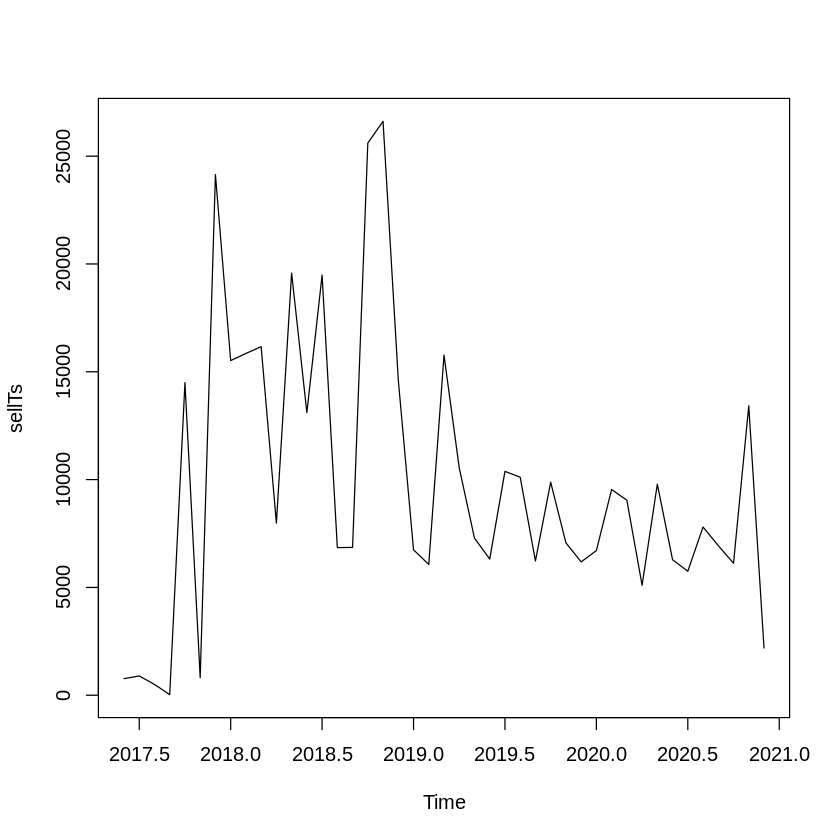

In [ ]:
plot(sellTs)

# 該公司總產量預估
The company's total production estimate

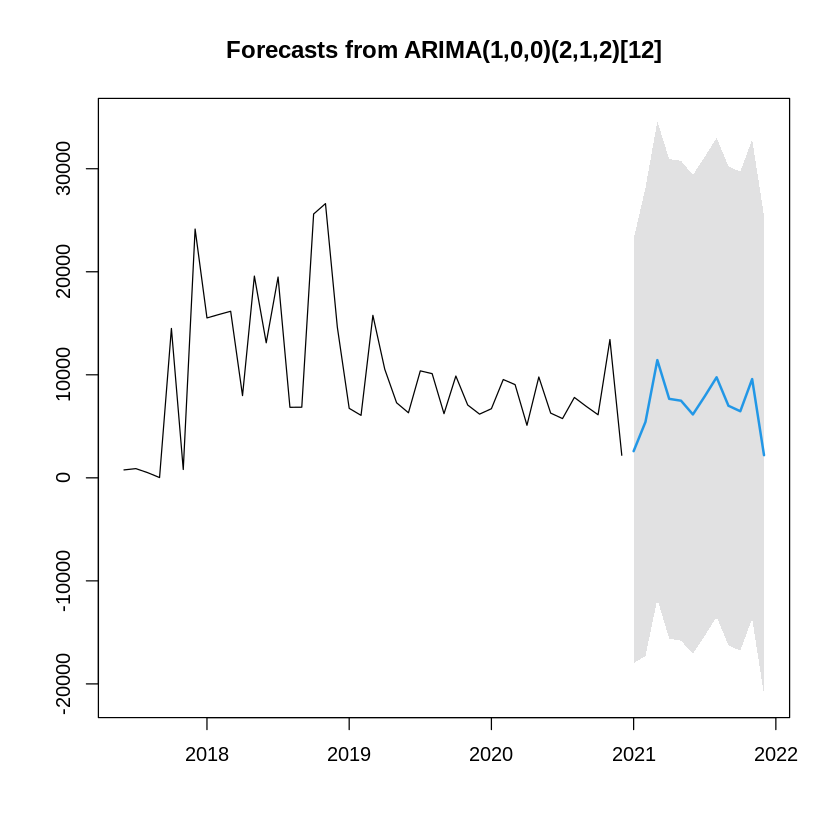

In [ ]:
plot(sellForecast)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2021,7389.468,8955.465,9427.209,9569.318,9612.127,9625.023,9628.908,9630.078,9630.431,9630.537,9630.569,9630.579
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2021,6342.632,6624.170,6649.128,6651.389,6651.594,6651.612,6651.614,6651.614,6651.614,6651.614,6651.614,6651.614


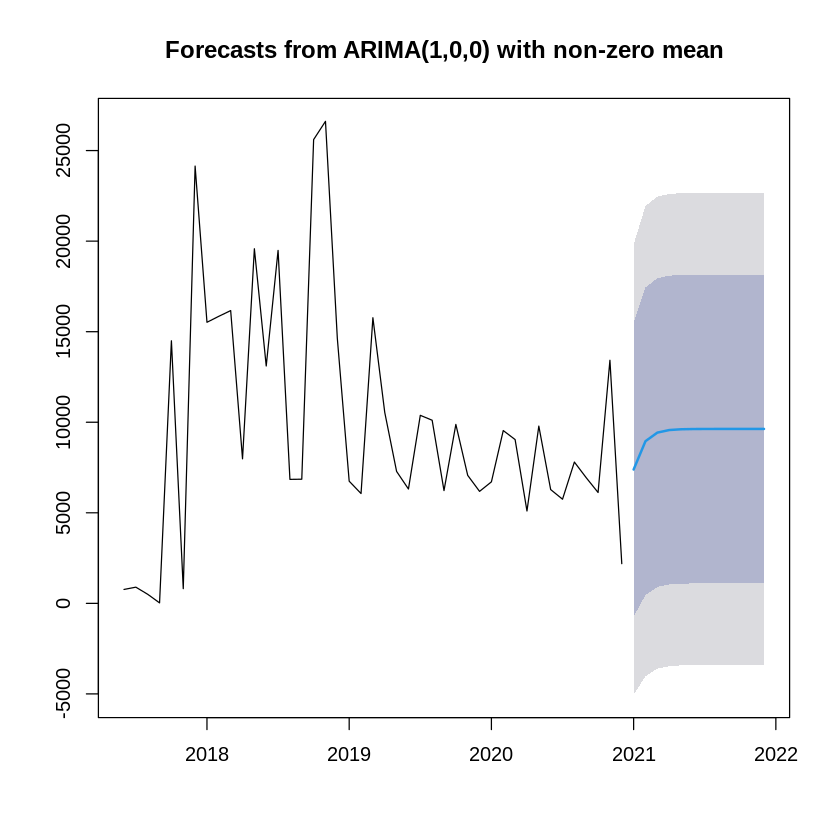

In [ ]:
#預測 (不好)
foreSell <- auto.arima( x = sellTs)
predict(foreSell, n.ahead = 12, se.fit = TRUE)
theForecast <- forecast(object = foreSell, h = 12)
plot(theForecast)

# 使用移動平均值將時間序列分解為季節性，趨勢和不規則分量。 處理加法或乘法季節性組件。
Use moving averages to decompose the time series into seasonal, trend, and irregular components. Handles additive or multiplicative seasonal components.
* Decompose a time series into seasonal, trend and irregular components using moving averages. Deals with additive or multiplicative seasonal component.
* 區分 observed, trend , searonal, random 四張圖

In [ ]:
# 使用移動平均值將時間序列分解為季節性，趨勢和不規則分量。 處理加法或乘法季節性組件。
# Decompose a time series into seasonal, trend and irregular components using moving averages. Deals with additive or multiplicative seasonal component.
# 區分 observed, trend , searonal, random 四張圖
f <- decompose(sellTs)
class(f) #查看變數的類型，顯示為因子
f

[1] "decomposed.ts"

$x
         Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep
2017                                           768.0   894.0   500.0    26.0
2018 15520.0 15850.0 16166.0  7980.0 19579.0 13107.0 19487.0  6846.0  6855.0
2019  6745.0  6064.0 15770.0 10545.0  7285.0  6314.0 10382.0 10111.0  6227.0
2020  6709.0  9541.0  9043.0  5100.0  9787.0  6283.0  5750.0  7802.0  6937.0
         Oct     Nov     Dec
2017 14497.0   811.0 24143.9
2018 25607.5 26615.0 14627.0
2019  9880.0  7068.0  6183.0
2020  6121.0 13422.1  2191.0

$seasonal
            Jan        Feb        Mar        Apr        May        Jun
2017                                                        -3085.2914
2018 -1720.3012 -1062.1623  1915.1016 -3849.2178   433.9613 -3085.2914
2019 -1720.3012 -1062.1623  1915.1016 -3849.2178   433.9613 -3085.2914
2020 -1720.3012 -1062.1623  1915.1016 -3849.2178   433.9613 -3085.2914
            Jul        Aug        Sep        Oct        Nov        Dec
2017  2194.0988 -3946.9012 -56

In [ ]:
names(f)

[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"

In [ ]:
f$figure

[1] -3085.2914  2194.0988 -3946.9012 -5604.5678  5806.5780  5168.3280
 [7]  3750.3738 -1720.3012 -1062.1623  1915.1016 -3849.2178   433.9613

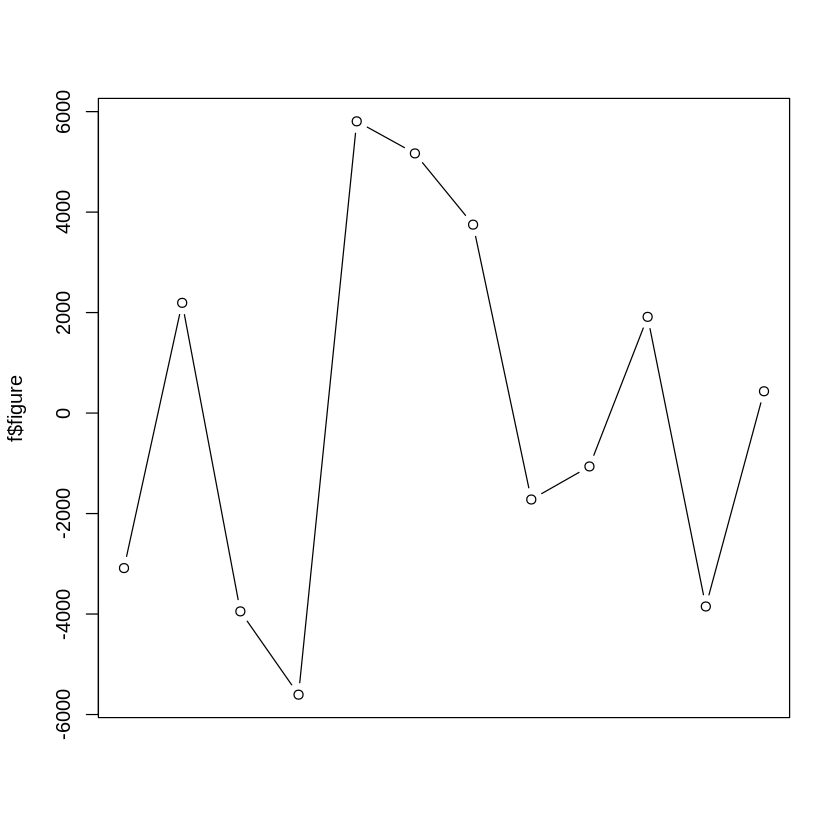

In [ ]:
plot(f$figure, type="b", xaxt="n", xlab="")

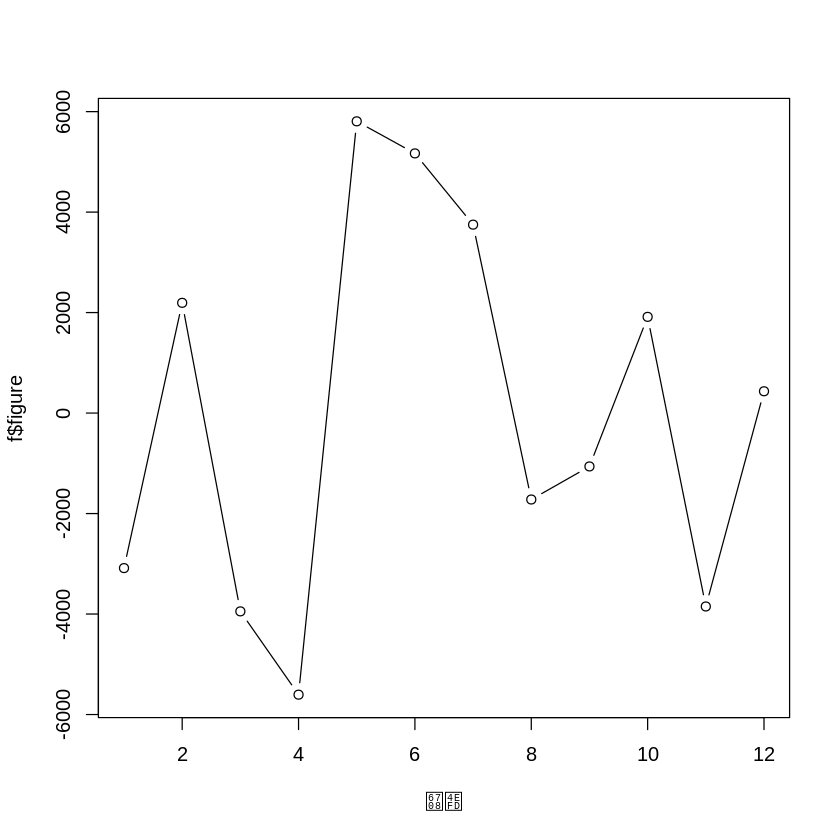

In [ ]:
plot(f$figure, type="b", xlab="Month")

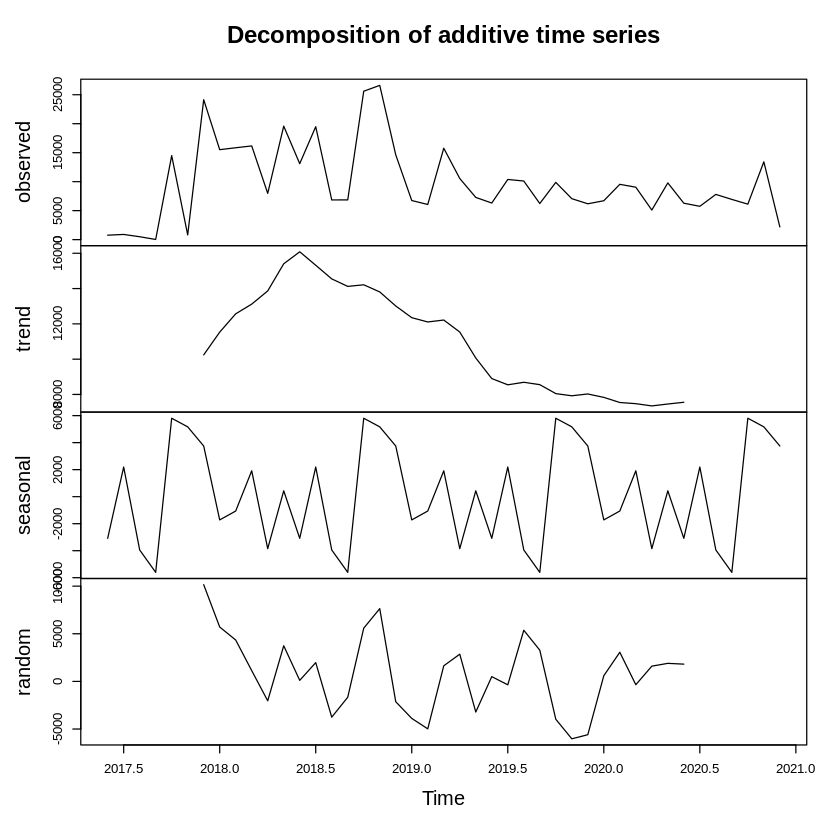

In [ ]:
plot(f)

# Homework01: 上述以該公司總產量預估為例，請各位同學可以依據暢銷產品(TOP 10)與 重要客戶(TOP 10 OR TOP 5)為例 做時間序列的預估?
Taking the company’s total output estimation as an example, please students can estimate the time series based on the best-selling products (TOP 10) and important customers (TOP 10 OR TOP 5)?


# Homework02:請由UCI資料集中找到與時間序列有關的資料集，依據本次課程內容作練習?
Please find the data set related to the time series from the UCI data set, and practice according to the content of this course?


# 以下程式碼不用執行  測試用
The following code does not need to be executed for testing

In [ ]:
save.image("/content/sample_data/R_InventoryManagement.RData")

In [ ]:
load("/content/sample_data/R_InventoryManagement.RData")

In [ ]:
orders02ClientID <- orders02 %>% group_by(clientID, order_year, order_mth) %>% 
  summarise(Count = n(), TotalQuantityOrder = sum( quantityOrder ))

dim(orders02ClientID)
head(orders02ClientID)

`summarise()` has grouped output by 'clientID', 'order_year'. You can override using the `.groups` argument.



[1] 4505    5

clientID,order_year,order_mth,Count,TotalQuantityOrder
<chr>,<dbl>,<dbl>,<int>,<dbl>
0010009,2020,5,10,30
0010009,2020,9,2,7
0010015,2020,4,2,2
0010015,2020,5,4,11
0010015,2020,7,5,9
0010015,2020,8,3,5


In [ ]:
orders02ClientID <- orders02 %>% group_by(clientID, order_year, order_mth) %>% 
  summarise(Count = n(), TotalQuantityOrder = sum( quantityOrder )) %>% arrange(order_year, order_mth,clientID )

dim(orders02ClientID)
head(orders02ClientID)

`summarise()` has grouped output by 'clientID', 'order_year'. You can override using the `.groups` argument.



[1] 4505    5

clientID,order_year,order_mth,Count,TotalQuantityOrder
<chr>,<dbl>,<dbl>,<int>,<dbl>
0040164,2017,6,6,768
0220012,2017,7,3,894
0020215,2017,8,9,500
0170177,2017,9,5,24
0240008,2017,9,2,2
0020320,2017,10,5,64


In [ ]:
dim(orders02ClientID)
orders02ClientID

[1] 4505    5

clientID,order_year,order_mth,Count,TotalQuantityOrder
<chr>,<dbl>,<dbl>,<int>,<dbl>
0040164,2017,6,6,768
0220012,2017,7,3,894
0020215,2017,8,9,500
0170177,2017,9,5,24
0240008,2017,9,2,2
0020320,2017,10,5,64
0020453,2017,10,3,400
0040033,2017,10,15,24
0040143,2017,10,1,26
